In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 18.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 22.3 MB/s eta 0:00:0

In [ ]:
!pip install textacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.7/312.7 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols, user_handles
from textacy.preprocessing.normalize import quotation_marks, bullet_points
from textacy.preprocessing.remove import punctuation
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/GPT-wiki-intro.csv')
df

,id,url,title,wiki_intro,generated_intro,title_len,wiki_intro_len,generated_intro_len,prompt,generated_text,prompt_tokens,generated_text_tokens
0,63064638,https://en.wikipedia.org/wiki/Sexhow%20railway...,Sexhow railway station,Sexhow railway station was a railway station b...,Sexhow railway station was a railway station l...,3,174,78,200 word wikipedia style introduction on 'Sexh...,"located in the town of Sexhow, on the Cumbria...",25,88
1,279621,https://en.wikipedia.org/wiki/Eti%C3%A4inen,Etiäinen,"In Finnish folklore, all places and things, an...","In Finnish folklore, all places and things, an...",1,187,80,200 word wikipedia style introduction on 'Etiä...,"animate or inanimate, have a spirit or ""etiäi...",26,101
2,287229,https://en.wikipedia.org/wiki/Inverse%20functi...,Inverse function theorem,"In mathematics, specifically differential calc...","In mathematics, specifically differential calc...",3,170,59,200 word wikipedia style introduction on 'Inve...,function theorem states that for every real-v...,26,65
3,26712375,https://en.wikipedia.org/wiki/Stepping%20on%20...,Stepping on Roses,is a Japanese shōjo manga series written and i...,is a Japanese shōjo manga series written and i...,3,335,121,200 word wikipedia style introduction on 'Step...,and illustrated by Maki Fujii. The series fol...,26,150
4,38894426,https://en.wikipedia.org/wiki/Rob%20Bradley,Rob Bradley,"Robert Milner ""Rob"" Bradley, Jr. (born August ...","Robert Milner ""Rob"" Bradley, Jr. (born August ...",2,170,136,200 word wikipedia style introduction on 'Rob ...,"29, 1973) is an American former professional ...",28,162
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,44173767,https://en.wikipedia.org/wiki/Randy%20Borum,Randy Borum,Randy Borum is a Professor and Coordinator of ...,Randy Borum is a Professor and Coordinator of ...,2,185,71,200 word wikipedia style introduction on 'Rand...,of the Master of Fine Arts Program in Creativ...,25,92
149996,33564134,https://en.wikipedia.org/wiki/Sa%27och%20language,Sa'och language,"Sa'och (, also, ""Sauch"") is an endangered, nea...","Sa'och (, also, ""Sauch"") is an endangered, nuc...",2,175,134,200 word wikipedia style introduction on 'Sa'o...,"nuclear-speaking, isolate language of the Ath...",33,184
149997,4219548,https://en.wikipedia.org/wiki/Philip%20Hanawalt,Philip Hanawalt,Philip C. Hanawalt (born 1931) is an American ...,Philip C. Hanawalt (born 1931) is an American ...,2,166,191,200 word wikipedia style introduction on 'Phil...,American graphic artist and illustrator. He i...,30,272
149998,2625970,https://en.wikipedia.org/wiki/Vossius%20Gymnasium,Vossius Gymnasium,Vossius Gymnasium is a public gymnasium in Ams...,Vossius Gymnasium is a public gymnasium in the...,2,168,108,200 word wikipedia style introduction on 'Voss...,"the town of Vossius, Netherlands. It is named...",32,147


In [ ]:
human_gen = df['wiki_intro']
ai_gen = df['generated_intro']
human_gen_df = human_gen.to_frame()
ai_gen_df = ai_gen.to_frame()
ai_gen_df = ai_gen_df.rename(columns={'generated_intro': 'wiki_intro'})
merged_df = pd.concat([human_gen_df,ai_gen_df])

In [ ]:
merged_df = merged_df.reset_index()
merged_df

,index,wiki_intro
0,0,Sexhow railway station was a railway station b...
1,1,"In Finnish folklore, all places and things, an..."
2,2,"In mathematics, specifically differential calc..."
3,3,is a Japanese shōjo manga series written and i...
4,4,"Robert Milner ""Rob"" Bradley, Jr. (born August ..."
...,...,...
299995,149995,Randy Borum is a Professor and Coordinator of ...
299996,149996,"Sa'och (, also, ""Sauch"") is an endangered, nuc..."
299997,149997,Philip C. Hanawalt (born 1931) is an American ...
299998,149998,Vossius Gymnasium is a public gymnasium in the...


In [ ]:
merged_df.drop(columns=['index'],inplace=True)
merged_df

,wiki_intro
0,Sexhow railway station was a railway station b...
1,"In Finnish folklore, all places and things, an..."
2,"In mathematics, specifically differential calc..."
3,is a Japanese shōjo manga series written and i...
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ..."
...,...
299995,Randy Borum is a Professor and Coordinator of ...
299996,"Sa'och (, also, ""Sauch"") is an endangered, nuc..."
299997,Philip C. Hanawalt (born 1931) is an American ...
299998,Vossius Gymnasium is a public gymnasium in the...


In [ ]:
merged_df['flag'] = 0  
merged_df.loc[merged_df.index < 150000, 'flag'] = 1 
merged_df = merged_df.rename(columns={'wiki_intro': 'text'})
merged_df = merged_df.rename(columns={'flag': 'label'})
merged_df

,text,label
0,Sexhow railway station was a railway station b...,1
1,"In Finnish folklore, all places and things, an...",1
2,"In mathematics, specifically differential calc...",1
3,is a Japanese shōjo manga series written and i...,1
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",1
...,...,...
299995,Randy Borum is a Professor and Coordinator of ...,0
299996,"Sa'och (, also, ""Sauch"") is an endangered, nuc...",0
299997,Philip C. Hanawalt (born 1931) is an American ...,0
299998,Vossius Gymnasium is a public gymnasium in the...,0


In [ ]:
import pandas as pd
import numpy as np

# Shuffle the DataFrame rows randomly
df = merged_df.sample(frac=1, random_state=42)

# Divide the DataFrame into 10 parts
num_rows = len(df)
part_size = int(num_rows / 10)
part1 = df.iloc[:part_size]
part2 = df.iloc[part_size:2*part_size]
part3 = df.iloc[2*part_size:3*part_size]
part4 = df.iloc[3*part_size:4*part_size]
part5 = df.iloc[4*part_size:5*part_size]
part6 = df.iloc[5*part_size:6*part_size]
part7 = df.iloc[6*part_size:7*part_size]
part8 = df.iloc[7*part_size:8*part_size]
part9 = df.iloc[8*part_size:9*part_size]
part10 = df.iloc[9*part_size:]

# Save the parts as separate CSV files
part1.to_csv('part1.csv', index=False)
part2.to_csv('part2.csv', index=False)
part3.to_csv('part3.csv', index=False)
part4.to_csv('part4.csv', index=False)
part5.to_csv('part5.csv', index=False)
part6.to_csv('part6.csv', index=False)
part7.to_csv('part7.csv', index=False)
part8.to_csv('part8.csv', index=False)
part9.to_csv('part9.csv', index=False)
part10.to_csv('part10.csv', index=False)

In [ ]:
part1

,text,label
4941,Sekhukhune I (Matsebe; circa 1814 – 13 August ...,1
51775,Mount Washington is a peak in the Olympic Mou...,1
115253,Acer hillsi is an extinct maple species in the...,1
299321,Derrick George Sherwin (16 April 1936 – 9 Dece...,0
173570,The Windows shell is the graphical user interf...,0
...,...,...
150314,The family Caenolestidae contains the seven su...,0
208724,"Fred W. Heard is an American minister, theolog...",0
84364,"Hezb-e Wahdat-e Islami Afghanistan (, ""the Isl...",1
217051,"Byrd Park, also known as William Byrd Park, is...",0


In [ ]:
part2

,text,label
129809,"Teruto ""Terry"" Tsubota (July 28, 1922 – May 22...",1
142218,"The Hildyard Baronetcy, of Patrington in the C...",1
7718,"is a Japanese sociologist and Japan's ""best-kn...",1
42287,{{Infobox Historic building\n| name = Manitoba...,1
268654,Interchange Plus is the common name for a fami...,0
...,...,...
120593,Timothy S. Dodge (1829-1883) (also known as T....,1
217018,"Elateridae or click beetles (or ""typical click...",0
89729,The Kirkuk–Baniyas pipeline is a crude oil pip...,1
31286,The was an influential Japanese literary cote...,1


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Pre Processing

In [ ]:
# Concatenate all the texts into a single string
all_text = " ".join(merged_df["text"])

# Split the string into words and count them
total_words = len(all_text.split())

print("Total number of words:", total_words)

Total number of words: 48981862


In [ ]:
# Split the string into words, convert to a set to remove duplicates, and count the unique words
unique_words = set(all_text.split())
num_unique_words = len(unique_words)

print("Number of unique words:", num_unique_words)

Number of unique words: 1530808


In [ ]:
shuffled_df = merged_df.sample(frac=1, random_state=42)
merged_df = shuffled_df.reset_index()
merged_df.drop(columns=['index'],inplace=True)
merged_df

,text,label
0,Sekhukhune I (Matsebe; circa 1814 – 13 August ...,1
1,Mount Washington is a peak in the Olympic Mou...,1
2,Acer hillsi is an extinct maple species in the...,1
3,Derrick George Sherwin (16 April 1936 – 9 Dece...,0
4,The Windows shell is the graphical user interf...,0
...,...,...
299995,OutServe Magazine was a bi-monthly digital and...,1
299996,Eastern Armenia ( Arevelyan Hayastan) is the e...,0
299997,Infinity Group is a private equity fund backed...,1
299998,Kattinakere (ಕಟ್ಟಿನಕೆರೆ) also called B Sagadde...,1


In [ ]:
df_data = merged_df.head(10000)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re

df = df_data

# Convert all text to lowercase
df['text'] = df['text'].apply(lambda x: x.lower())

# Remove special characters and punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
df['text'] = df['text'].apply(remove_punctuation)

# Remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)
df['text'] = df['text'].apply(remove_stopwords)

# Stemming
stemmer = PorterStemmer()
def stem_text(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)
df['text'] = df['text'].apply(stem_text)

# Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)
df['text'] = df['text'].apply(lemmatize_text)


<ipython-input-13-50a544dda068>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower())
<ipython-input-13-50a544dda068>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_punctuation)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-13-50a544dda068>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [ ]:
df

,text,label
0,sekhukhun matseb circa 1814 – 13 august 1882 p...,1
1,mount washington peak olymp mountain washingto...,1
2,acer hillsi extinct mapl speci famili sapindac...,1
3,derrick georg sherwin 16 april 1936 – 9 decemb...,0
4,window shell graphic user interfac provid wind...,0
...,...,...
9995,fullsiz luxuri suv produc lexu 1998 2006 base ...,0
9996,william snyder american photojournalist photo ...,0
9997,pradeshika varthak 1989 indian malayalamlangua...,1
9998,region medicin inform centr reli publicli fund...,1


<ipython-input-17-555b44d7ee15>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_length'] = df['text'].apply(avg_length)


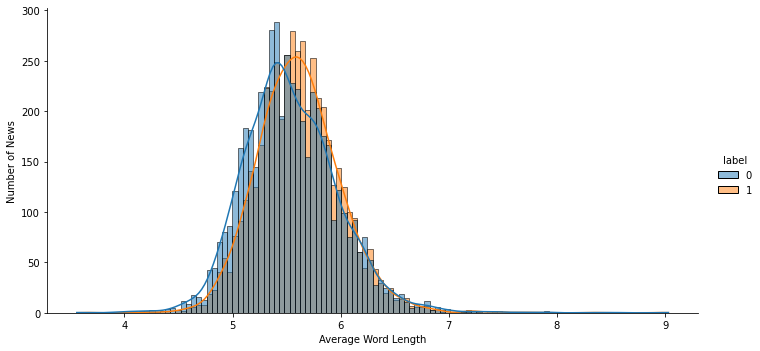

In [ ]:
# average word length
def avg_length(sentence):
  if sentence.strip()!='':
    words = sentence.split()
    average = round(sum(len(word) for word in words)/len(words), 2)
    return average
df['avg_length'] = df['text'].apply(avg_length)

sns.displot(df[df['avg_length'] < 10], x = 'avg_length', hue = 'label', kde = True, height = 5, aspect = 2)
plt.xlabel('Average Word Length')
plt.ylabel('Number of News')
plt.show()

In [ ]:
df

,text,label,avg_length
0,sekhukhun matseb circa 1814 – 13 august 1882 p...,1,5.84
1,mount washington peak olymp mountain washingto...,1,5.82
2,acer hillsi extinct mapl speci famili sapindac...,1,5.90
3,derrick georg sherwin 16 april 1936 – 9 decemb...,0,5.17
4,window shell graphic user interfac provid wind...,0,5.49
...,...,...,...
9995,fullsiz luxuri suv produc lexu 1998 2006 base ...,0,4.74
9996,william snyder american photojournalist photo ...,0,6.27
9997,pradeshika varthak 1989 indian malayalamlangua...,1,5.74
9998,region medicin inform centr reli publicli fund...,1,5.95


In [ ]:
df = df.rename(columns={'text': 'text_column'})

In [ ]:
df['char_count'] = df['text_column'].apply(len)
df['digit_percent'] = df['text_column'].apply(lambda x: len([c for c in x if c.isdigit()])/len(x))
df['letter_percent'] = df['text_column'].apply(lambda x: len([c for c in x if c.isalpha()])/len(x))
df['upper_percent'] = df['text_column'].apply(lambda x: len([c for c in x if c.isupper()])/len(x))
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='char')
char_unigram = cv.fit_transform(df['text_column'])
char_unigram_df = pd.DataFrame(char_unigram.toarray(), columns=cv.get_feature_names_out())
df = pd.concat([df, char_unigram_df], axis=1)
from nltk import ngrams

def get_top_ngrams(corpus, ngram_range, n):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

bigram_freq = get_top_ngrams(df['text_column'], (2, 2), 40)
trigram_freq = get_top_ngrams(df['text_column'], (3, 3), 40)

bigram_cols = ['bigram_' + bigram[0].replace(' ', '_') for bigram in bigram_freq]
trigram_cols = ['trigram_' + trigram[0].replace(' ', '_') for trigram in trigram_freq]

for bigram_col, bigram in zip(bigram_cols, bigram_freq):
    df[bigram_col] = df['text_column'].apply(lambda x: len([i for i in ngrams(x, 2)]) if bigram[0] in [''.join(i) for i in ngrams(x, 2)] else 0)

for trigram_col, trigram in zip(trigram_cols, trigram_freq):
    df[trigram_col] = df['text_column'].apply(lambda x: len([i for i in ngrams(x, 3)]) if trigram[0] in [''.join(i) for i in ngrams(x, 3)] else 0)


In [ ]:
df

,text_column,label,avg_length,char_count,digit_percent,letter_percent,upper_percent,,0,1,...,trigram_move_new_york,trigram_academi_award_best,trigram_play_colleg_footbal,trigram_studio_album_american,trigram_profession_footbal_play,trigram_american_civil_war,trigram_american_rock_band,trigram_music_critic_prais,trigram_graduat_high_school,trigram_billboard_200_chart
0,sekhukhun matseb circa 1814 – 13 august 1882 p...,1,5.84,704,0.045455,0.808239,0.0,102,1,12,...,0,0,0,0,0,0,0,0,0,0
1,mount washington peak olymp mountain washingto...,1,5.82,640,0.000000,0.854688,0.0,93,0,0,...,0,0,0,0,0,0,0,0,0,0
2,acer hillsi extinct mapl speci famili sapindac...,1,5.90,1159,0.006903,0.848145,0.0,167,4,0,...,0,0,0,0,0,0,0,0,0,0
3,derrick georg sherwin 16 april 1936 – 9 decemb...,0,5.17,443,0.074492,0.762980,0.0,71,4,7,...,0,0,0,0,0,0,0,0,0,0
4,window shell graphic user interfac provid wind...,0,5.49,499,0.000000,0.847695,0.0,76,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,fullsiz luxuri suv produc lexu 1998 2006 base ...,0,4.74,269,0.111524,0.717472,0.0,46,8,1,...,0,0,0,0,0,0,0,0,0,0
9996,william snyder american photojournalist photo ...,0,6.27,297,0.026936,0.838384,0.0,40,3,1,...,0,0,0,0,0,0,0,0,0,0
9997,pradeshika varthak 1989 indian malayalamlangua...,1,5.74,1252,0.003195,0.849042,0.0,185,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,region medicin inform centr reli publicli fund...,1,5.95,694,0.011527,0.845821,0.0,99,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def count_digits(text):
    return sum(1 for char in text if char.isdigit())

df['num_digits'] = df['text_column'].apply(count_digits)
import string

def count_special_chars(text):
    return sum(1 for char in text if char in string.punctuation + string.whitespace)

df['num_special_chars'] = df['text_column'].apply(count_special_chars)
def count_words(text):
    return len(text.split())

df['num_words'] = df['text_column'].apply(count_words)
import nltk

nltk.download('punkt')

def avg_words_per_sentence(text):
    sentences = nltk.sent_tokenize(text)
    return sum(len(sentence.split()) for sentence in sentences) / len(sentences)

df['avg_words_per_sentence'] = df['text_column'].apply(avg_words_per_sentence)
nltk.download('words')
words = set(nltk.corpus.words.words())

def count_oov_words(text):
    return sum(1 for word in text.split() if word.lower() not in words)

df['num_oov_words'] = df['text_column'].apply(count_oov_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df

,text_column,label,avg_length,char_count,digit_percent,letter_percent,upper_percent,,0,1,...,trigram_american_civil_war,trigram_american_rock_band,trigram_music_critic_prais,trigram_graduat_high_school,trigram_billboard_200_chart,num_digits,num_special_chars,num_words,avg_words_per_sentence,num_oov_words
0,sekhukhun matseb circa 1814 – 13 august 1882 p...,1,5.84,704,0.045455,0.808239,0.0,102,1,12,...,0,0,0,0,0,32,102,103,103.0,58
1,mount washington peak olymp mountain washingto...,1,5.82,640,0.000000,0.854688,0.0,93,0,0,...,0,0,0,0,0,0,93,94,94.0,35
2,acer hillsi extinct mapl speci famili sapindac...,1,5.90,1159,0.006903,0.848145,0.0,167,4,0,...,0,0,0,0,0,8,167,168,168.0,78
3,derrick georg sherwin 16 april 1936 – 9 decemb...,0,5.17,443,0.074492,0.762980,0.0,71,4,7,...,0,0,0,0,0,33,71,72,72.0,41
4,window shell graphic user interfac provid wind...,0,5.49,499,0.000000,0.847695,0.0,76,0,0,...,0,0,0,0,0,0,76,77,77.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,fullsiz luxuri suv produc lexu 1998 2006 base ...,0,4.74,269,0.111524,0.717472,0.0,46,8,1,...,0,0,0,0,0,30,46,47,47.0,28
9996,william snyder american photojournalist photo ...,0,6.27,297,0.026936,0.838384,0.0,40,3,1,...,0,0,0,0,0,8,40,41,41.0,23
9997,pradeshika varthak 1989 indian malayalamlangua...,1,5.74,1252,0.003195,0.849042,0.0,185,0,1,...,0,0,0,0,0,4,185,186,186.0,96
9998,region medicin inform centr reli publicli fund...,1,5.95,694,0.011527,0.845821,0.0,99,2,2,...,0,0,0,0,0,8,99,100,100.0,44


In [ ]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
nlp = spacy.load('en_core_web_sm')
def avg_POS_types_per_sentence(text):
    sentences = nltk.sent_tokenize(text)
    pos_counts = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        pos_tags = [tag for word, tag in nltk.pos_tag(tokens)]
        pos_count = len(set(pos_tags))
        pos_counts.append(pos_count)
    return sum(pos_counts) / len(pos_counts)

df['avg_POS_types_per_sentence'] = df['text_column'].apply(avg_POS_types_per_sentence)

def pos_to_unique_words_ratio(text):
    doc = nlp(text)
    pos_set = set()
    for token in doc:
        pos_set.add(token.pos_)
    unique_words = len(set([token.text for token in doc]))
    return len(pos_set) / unique_words
df['pos_to_unique_words_ratio'] = df['text_column'].apply(pos_to_unique_words_ratio)
def count_sentences(text):
    doc = nlp(text)
    return len(list(doc.sents))
df['count_sentences'] = df['text_column'].apply(count_sentences)
def avg_sentence_length(text):
    doc = nlp(text)
    total_len = sum([len(sent) for sent in doc.sents])
    return total_len / len(list(doc.sents))
df['avg_sentence_length'] = df['text_column'].apply(avg_sentence_length)

In [ ]:
df

,text_column,label,avg_length,char_count,digit_percent,letter_percent,upper_percent,,0,1,...,trigram_billboard_200_chart,num_digits,num_special_chars,num_words,avg_words_per_sentence,num_oov_words,avg_POS_types_per_sentence,pos_to_unique_words_ratio,count_sentences,avg_sentence_length
0,sekhukhun matseb circa 1814 – 13 august 1882 p...,1,5.84,704,0.045455,0.808239,0.0,102,1,12,...,0,32,102,103,103.0,58,16.0,0.101124,2,51.5
1,mount washington peak olymp mountain washingto...,1,5.82,640,0.000000,0.854688,0.0,93,0,0,...,0,0,93,94,94.0,35,8.0,0.104478,1,94.0
2,acer hillsi extinct mapl speci famili sapindac...,1,5.90,1159,0.006903,0.848145,0.0,167,4,0,...,0,8,167,168,168.0,78,11.0,0.080000,2,85.0
3,derrick georg sherwin 16 april 1936 – 9 decemb...,0,5.17,443,0.074492,0.762980,0.0,71,4,7,...,0,33,71,72,72.0,41,10.0,0.169811,1,72.0
4,window shell graphic user interfac provid wind...,0,5.49,499,0.000000,0.847695,0.0,76,0,0,...,0,0,76,77,77.0,21,9.0,0.181818,1,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,fullsiz luxuri suv produc lexu 1998 2006 base ...,0,4.74,269,0.111524,0.717472,0.0,46,8,1,...,0,30,46,47,47.0,28,6.0,0.222222,2,23.5
9996,william snyder american photojournalist photo ...,0,6.27,297,0.026936,0.838384,0.0,40,3,1,...,0,8,40,41,41.0,23,6.0,0.138889,1,41.0
9997,pradeshika varthak 1989 indian malayalamlangua...,1,5.74,1252,0.003195,0.849042,0.0,185,0,1,...,0,4,185,186,186.0,96,12.0,0.066176,2,93.5
9998,region medicin inform centr reli publicli fund...,1,5.95,694,0.011527,0.845821,0.0,99,2,2,...,0,8,99,100,100.0,44,10.0,0.093750,1,100.0


In [ ]:

text_data = df['text_column']
vectorizer = CountVectorizer()
vectorizer.fit(text_data)
X = vectorizer.transform(text_data)
text_vectors = X.toarray()
text_df = pd.DataFrame(text_vectors, columns=vectorizer.get_feature_names_out())
new_data = pd.concat([df, text_df], axis=1)


In [ ]:
new_data

,text_column,label,avg_length,char_count,digit_percent,letter_percent,upper_percent,,0,1,...,죽여,지연,지옥의,차가운,촛물,칠선녀교,핏줄,하리수,하지마,한국의
0,sekhukhun matseb circa 1814 – 13 august 1882 p...,1,5.84,704,0.045455,0.808239,0.0,102,1,12,...,0,0,0,0,0,0,0,0,0,0
1,mount washington peak olymp mountain washingto...,1,5.82,640,0.000000,0.854688,0.0,93,0,0,...,0,0,0,0,0,0,0,0,0,0
2,acer hillsi extinct mapl speci famili sapindac...,1,5.90,1159,0.006903,0.848145,0.0,167,4,0,...,0,0,0,0,0,0,0,0,0,0
3,derrick georg sherwin 16 april 1936 – 9 decemb...,0,5.17,443,0.074492,0.762980,0.0,71,4,7,...,0,0,0,0,0,0,0,0,0,0
4,window shell graphic user interfac provid wind...,0,5.49,499,0.000000,0.847695,0.0,76,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,fullsiz luxuri suv produc lexu 1998 2006 base ...,0,4.74,269,0.111524,0.717472,0.0,46,8,1,...,0,0,0,0,0,0,0,0,0,0
9996,william snyder american photojournalist photo ...,0,6.27,297,0.026936,0.838384,0.0,40,3,1,...,0,0,0,0,0,0,0,0,0,0
9997,pradeshika varthak 1989 indian malayalamlangua...,1,5.74,1252,0.003195,0.849042,0.0,185,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,region medicin inform centr reli publicli fund...,1,5.95,694,0.011527,0.845821,0.0,99,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df.drop(columns = ['label','text_column'])
y = df['label']
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:\n', conf_matrix)

Accuracy: 0.7805
Confusion matrix:
 [[794 233]
 [206 767]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.4 MB/s eta 0:00:00


In [ ]:
df

,text_column,label,avg_length,char_count,digit_percent,letter_percent,upper_percent,,0,1,...,trigram_billboard_200_chart,num_digits,num_special_chars,num_words,avg_words_per_sentence,num_oov_words,avg_POS_types_per_sentence,pos_to_unique_words_ratio,count_sentences,avg_sentence_length
0,sekhukhun matseb circa 1814 – 13 august 1882 p...,1,5.84,704,0.045455,0.808239,0.0,102,1,12,...,0,32,102,103,103.0,58,16.0,0.101124,2,51.5
1,mount washington peak olymp mountain washingto...,1,5.82,640,0.000000,0.854688,0.0,93,0,0,...,0,0,93,94,94.0,35,8.0,0.104478,1,94.0
2,acer hillsi extinct mapl speci famili sapindac...,1,5.90,1159,0.006903,0.848145,0.0,167,4,0,...,0,8,167,168,168.0,78,11.0,0.080000,2,85.0
3,derrick georg sherwin 16 april 1936 – 9 decemb...,0,5.17,443,0.074492,0.762980,0.0,71,4,7,...,0,33,71,72,72.0,41,10.0,0.169811,1,72.0
4,window shell graphic user interfac provid wind...,0,5.49,499,0.000000,0.847695,0.0,76,0,0,...,0,0,76,77,77.0,21,9.0,0.181818,1,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,fullsiz luxuri suv produc lexu 1998 2006 base ...,0,4.74,269,0.111524,0.717472,0.0,46,8,1,...,0,30,46,47,47.0,28,6.0,0.222222,2,23.5
9996,william snyder american photojournalist photo ...,0,6.27,297,0.026936,0.838384,0.0,40,3,1,...,0,8,40,41,41.0,23,6.0,0.138889,1,41.0
9997,pradeshika varthak 1989 indian malayalamlangua...,1,5.74,1252,0.003195,0.849042,0.0,185,0,1,...,0,4,185,186,186.0,96,12.0,0.066176,2,93.5
9998,region medicin inform centr reli publicli fund...,1,5.95,694,0.011527,0.845821,0.0,99,2,2,...,0,8,99,100,100.0,44,10.0,0.093750,1,100.0


In [ ]:
import nltk
from nltk.metrics import BigramAssocMeasures, scores
from nltk.collocations import BigramCollocationFinder
from nltk.tokenize import word_tokenize
from transformers import pipeline

# calculate perplexity
tokens = df['text_column'].apply(word_tokenize)
text = nltk.Text(tokens.sum())
dist = nltk.probability.MLEProbDist(nltk.FreqDist(text))
perplexity = dist.entropy()

# calculate burstiness
finder = BigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(BigramAssocMeasures.raw_freq)
burstiness = scored[0][1] / scored[-1][1]

# calculate BERT score
nlp = pipeline('text2text-generation', model='bert-base-cased', device=0)
target_text = "target text"
generated_text = nlp(target_text)[0]['generated_text']
bert_score = pipeline('text2text-generation', model='bert-base-cased', device=0, metric='bertscore')(generated_text, target_text)['f1']

# display the evaluation metrics
print(f'Perplexity: {perplexity}')
print(f'Burstiness: {burstiness}')
print(f'BERT Score: {bert_score}')
#print(f'Recall: {recall}')
#print(f'ROUGE Score: {rouge}')


AttributeError: ignored

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
def process_data(row):

    text = row['text']
    text = str(text)
    text = ' '.join(text.split())

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    label = 0
    if row['label'] == 1:
        label += 1

    encodings['label'] = label
    encodings['text'] = text

    return encodings

print(process_data({
    'text': 'this is a sample review of a movie.',
    'label': 1
}))

{'input_ids': [101, 2023, 2003, 1037, 7099, 3319, 1997, 1037, 3185, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
processed_data = []

for i in range(len(df[:10000])):
    processed_data.append(process_data(df.iloc[i]))

In [ ]:
from sklearn.model_selection import train_test_split

new_df = pd.DataFrame(processed_data)

train_df, valid_df = train_test_split(
    new_df,
    test_size=0.2,
    random_state=2022
)

In [ ]:
import pyarrow as pa
from datasets import Dataset

train_hg = Dataset(pa.Table.from_pandas(train_df))
valid_hg = Dataset(pa.Table.from_pandas(valid_df))

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="./result", evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_hg,
    eval_dataset=valid_hg,
    tokenizer=tokenizer
)

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
1,0.365800,0.426443
2,0.211400,0.357939
3,0.076400,0.358045


TrainOutput(global_step=3000, training_loss=0.23807241185506184, metrics={'train_runtime': 721.0943, 'train_samples_per_second': 33.283, 'train_steps_per_second': 4.16, 'total_flos': 1578666332160000.0, 'train_loss': 0.23807241185506184, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.3580450415611267,
 'eval_runtime': 15.7394,
 'eval_samples_per_second': 127.069,
 'eval_steps_per_second': 15.884,
 'epoch': 3.0}

AttributeError: ignored

In [ ]:
model.save_pretrained('./model/')

In [ ]:
from transformers import AutoModelForSequenceClassification

new_model = AutoModelForSequenceClassification.from_pretrained('./model/')

In [ ]:
def get_prediction(text):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
    model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased').to(device)

    encoding = tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=128).to(device)

    outputs = model(**encoding)

    logits = outputs.logits

    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(logits.squeeze().cpu())
    probs = probs.detach().numpy()
    label = np.argmax(probs, axis=-1)
    
    if label == 1:
        return {
            'label': 1,
            'probability': probs[1]
        }
    else:
        return {
            'label': 0,
            'probability': probs[0]
        }

In [ ]:
get_prediction('''Artificial intelligence has the potential to revolutionize many different fields, from healthcare to finance to transportation. By analyzing vast amounts of data and making predictions based on that data, AI can help businesses make more informed decisions, doctors diagnose diseases more accurately, and even prevent car accidents. However, there are also concerns about the ethical implications of AI, such as the possibility of bias in algorithms or the displacement of human workers. As AI technology continues to advance, it will be important to address these issues and ensure that AI is used for the benefit of society as a whole.''')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

{'label': 1, 'probability': 0.51808023}